In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

import torch
import torchvision
import torchvision.transforms as transforms
import seaborn as sns
import pandas as pd
import numpy as np
import random

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

trainset.data = torch.Tensor(trainset.data).reshape(-1,3072) / 255.0
testset.data = torch.Tensor(testset.data).reshape(-1,3072) / 255.0

trainset.targets = np.array(trainset.targets)
testset.targets = np.array(testset.targets)

trainset.targets = torch.LongTensor(trainset.targets.astype("int"))
testset.targets = torch.LongTensor(testset.targets.astype("int"))

trainset_tensor = TensorDataset(trainset.data,trainset.targets)
testset_tensor = TensorDataset(testset.data,testset.targets)


trainloader = torch.utils.data.DataLoader(trainset_tensor, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset_tensor, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [ ]:
random.seed(156)
torch.manual_seed(156)
if device == 'cuda':
    torch.cuda.manual_seed_all(156)

In [ ]:
X_normalize = mnist.data.values / 255.0
X = mnist.data.values
y = mnist.target.astype("int")

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_normalize,y,test_size=1/7,random_state=0,shuffle=True)
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test.values)

ds_train = TensorDataset(X_train,y_train)
ds_test = TensorDataset(X_test,y_test)

loader_train = DataLoader(ds_train,batch_size=64,shuffle=True,drop_last=True)
loader_test = DataLoader(ds_test,batch_size=64,shuffle=False)

  


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
class MLP(nn.Module):
  def __init__(self,input_size,hidden_size,output_size,batch,dropout,trainset):
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.batch = batch
    self.dropout = dropout
    self.trainset = trainset

    if trainset == "mnist":

      if (self.batch == False) & (self.dropout == False):
        self.linear = nn.Sequential()
        self.linear.add_module("fc1",nn.Linear(input_size,hidden_size))
        self.linear.add_module("relu1",nn.ReLU())
        self.linear.add_module("fc2",nn.Linear(hidden_size,hidden_size))
        self.linear.add_module("relu2",nn.ReLU())
        self.linear.add_module("fc3",nn.Linear(hidden_size,10))
    
      elif (self.batch == True) & (self.dropout == False):
        self.linear = nn.Sequential()
        self.linear.add_module("fc1",nn.Linear(input_size,hidden_size))
        self.linear.add_module("batch1",nn.BatchNorm1d(hidden_size))
        self.linear.add_module("relu1",nn.ReLU())
        self.linear.add_module("fc2",nn.Linear(hidden_size,hidden_size))
        self.linear.add_module("batch2",nn.BatchNorm1d(hidden_size))
        self.linear.add_module("relu2",nn.ReLU())
        self.linear.add_module("fc3",nn.Linear(hidden_size,output_size))

      elif (self.batch == False) & (self.dropout == True):
        self.linear = nn.Sequential()
        self.linear.add_module("fc1",nn.Linear(input_size,hidden_size))
        self.linear.add_module("relu1",nn.ReLU())
        self.linear.add_module("dropout1",nn.Dropout(0.2))
        self.linear.add_module("fc2",nn.Linear(hidden_size,hidden_size))
        self.linear.add_module("relu2",nn.ReLU())
        self.linear.add_module("dropout2",nn.Dropout(0.2))
        self.linear.add_module("fc3",nn.Linear(hidden_size,output_size))

      elif (self.batch == True) & (self.dropout == True):
        self.linear = nn.Sequential()
        self.linear.add_module("fc1",nn.Linear(input_size,hidden_size))
        self.linear.add_module("batch1",nn.BatchNorm1d(hidden_size))
        self.linear.add_module("relu1",nn.ReLU())
        self.linear.add_module("dropout1",nn.Dropout(0.2))
        self.linear.add_module("fc2",nn.Linear(hidden_size,hidden_size))
        self.linear.add_module("batch2",nn.BatchNorm1d(hidden_size))
        self.linear.add_module("relu2",nn.ReLU())
        self.linear.add_module("dropout2",nn.Dropout(0.2))
        self.linear.add_module("fc3",nn.Linear(hidden_size,output_size))
    
    elif trainset == "cifar10":

      if (self.batch == False) & (self.dropout == False):
        self.linear = nn.Sequential()
        self.linear.add_module("fc1",nn.Linear(input_size,hidden_size))
        self.linear.add_module("relu1",nn.ReLU())
        self.linear.add_module("fc2",nn.Linear(hidden_size,512))
        self.linear.add_module("relu2",nn.ReLU())
        self.linear.add_module("fc3",nn.Linear(512,output_size))

      elif (self.batch == True) & (self.dropout == False):
        self.linear = nn.Sequential()
        self.linear.add_module("fc1",nn.Linear(input_size,hidden_size))
        self.linear.add_module("batch1",nn.BatchNorm1d(hidden_size))
        self.linear.add_module("relu1",nn.ReLU())
        self.linear.add_module("fc2",nn.Linear(hidden_size,512))
        self.linear.add_module("batch2",nn.BatchNorm1d(512))
        self.linear.add_module("relu2",nn.ReLU())
        self.linear.add_module("fc3",nn.Linear(512,output_size))

      elif (self.batch == False) & (self.dropout == True):
        self.linear = nn.Sequential()
        self.linear.add_module("fc1",nn.Linear(input_size,hidden_size))
        self.linear.add_module("relu1",nn.ReLU())
        self.linear.add_module("dropout1",nn.Dropout(0.5))
        self.linear.add_module("fc2",nn.Linear(hidden_size,512))
        self.linear.add_module("relu2",nn.ReLU())
        self.linear.add_module("dropout2",nn.Dropout(0.5))
        self.linear.add_module("fc3",nn.Linear(512,output_size))

      elif (self.batch == True) & (self.dropout == True):
        self.linear = nn.Sequential()
        self.linear.add_module("fc1",nn.Linear(input_size,hidden_size))
        self.linear.add_module("batch1",nn.BatchNorm1d(hidden_size))
        self.linear.add_module("relu1",nn.ReLU())
        self.linear.add_module("dropout1",nn.Dropout(0.5))
        self.linear.add_module("fc2",nn.Linear(hidden_size,512))
        self.linear.add_module("batch2",nn.BatchNorm1d(512))
        self.linear.add_module("relu2",nn.ReLU())
        self.linear.add_module("dropout2",nn.Dropout(0.5))
        self.linear.add_module("fc3",nn.Linear(512,output_size))


  def forward(self,x):
    out = self.linear(x)
    return out
    
    

In [ ]:
def init_weights(m):
  if type(m) == nn.Linear:
    torch.nn.init.kaiming_uniform(m.weight)
    m.bias.data.fill_(0.01)

In [ ]:
model = MLP(input_size=784,hidden_size=100,output_size=10,batch=False,dropout=False,trainset="mnist").to(device)
model.apply(init_weights)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
epochs = 10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def train_fit(loader_train,epochs):
  
  model.train()

  loss = []
  
  for epoch in range(epochs):

    avg_cost= 0
    total_batch = len(loader_train)
    
    for data,targets in loader_train:
      data = data.to(device)
      targets = targets.to(device)
      
      outputs = model(data)
      cost = criterion(outputs,targets)
      avg_cost += cost / total_batch
      optimizer.zero_grad()
      cost.backward()
      optimizer.step()
    
    loss.append(avg_cost)
    print("Epoch {} 일때 loss 값 {} 입니다.".format(epoch+1,avg_cost))
  return loss

In [ ]:
def train(loader_train):
  model.eval()
  correct = 0

  with torch.no_grad():
    for data,targets in loader_train:
      data = data.to(device)
      targets = targets.to(device)

      outputs = model(data)

      _,predicted = torch.max(outputs.data,1)
      correct += predicted.eq(targets.data.view_as(predicted)).sum()
  
  data_num = len(loader_train.dataset)
  print("\n학습 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n".format(correct,data_num,100 * correct / data_num))


In [ ]:
def test(loader_test):
  model.eval()
  correct = 0

  with torch.no_grad():
    for data,targets in loader_test:
      data = data.to(device)
      targets = targets.to(device)

      outputs = model(data)

      _,predicted = torch.max(outputs.data,1)
      correct += predicted.eq(targets.data.view_as(predicted)).sum()
  
  data_num = len(loader_test.dataset)
  print("\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n".format(correct,data_num,100 * correct / data_num))

# 정규화 안한 입력값

## mnist

In [ ]:
loss = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 1.117785930633545 입니다.
Epoch 2 일때 loss 값 0.6901662945747375 입니다.
Epoch 3 일때 loss 값 0.8566897511482239 입니다.
Epoch 4 일때 loss 값 0.9908852577209473 입니다.
Epoch 5 일때 loss 값 1.0679092407226562 입니다.
Epoch 6 일때 loss 값 0.909058690071106 입니다.
Epoch 7 일때 loss 값 0.9152427911758423 입니다.
Epoch 8 일때 loss 값 0.8220182657241821 입니다.
Epoch 9 일때 loss 값 0.8392226696014404 입니다.
Epoch 10 일때 loss 값 0.8913858532905579 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 43133/60000 (72%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 7190/10000 (72%)



## cifar10

In [ ]:
loss_value = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 77.12879180908203 입니다.
Epoch 2 일때 loss 값 2.303278684616089 입니다.
Epoch 3 일때 loss 값 2.303525686264038 입니다.
Epoch 4 일때 loss 값 2.3034934997558594 입니다.
Epoch 5 일때 loss 값 2.3035664558410645 입니다.
Epoch 6 일때 loss 값 2.3035573959350586 입니다.
Epoch 7 일때 loss 값 2.303605556488037 입니다.
Epoch 8 일때 loss 값 2.303496837615967 입니다.
Epoch 9 일때 loss 값 2.303546667098999 입니다.
Epoch 10 일때 loss 값 2.3037025928497314 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 5000/50000 (10%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 999/10000 (10%)



# 정규화 한 입력값

## mnist

In [ ]:
loss_normalize = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 0.2436121553182602 입니다.
Epoch 2 일때 loss 값 0.14758731424808502 입니다.
Epoch 3 일때 loss 값 0.12555450201034546 입니다.
Epoch 4 일때 loss 값 0.12154647707939148 입니다.
Epoch 5 일때 loss 값 0.10273284465074539 입니다.
Epoch 6 일때 loss 값 0.09738820791244507 입니다.
Epoch 7 일때 loss 값 0.09139926731586456 입니다.
Epoch 8 일때 loss 값 0.08373139053583145 입니다.
Epoch 9 일때 loss 값 0.08922019600868225 입니다.
Epoch 10 일때 loss 값 0.08170217275619507 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 58688/60000 (98%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9602/10000 (96%)



## cifar10

In [ ]:
loss_value_normalize = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 2.332401990890503 입니다.
Epoch 2 일때 loss 값 2.109219789505005 입니다.
Epoch 3 일때 loss 값 2.0917792320251465 입니다.
Epoch 4 일때 loss 값 2.0941498279571533 입니다.
Epoch 5 일때 loss 값 2.0956649780273438 입니다.
Epoch 6 일때 loss 값 2.089939832687378 입니다.
Epoch 7 일때 loss 값 2.1377675533294678 입니다.
Epoch 8 일때 loss 값 2.0993032455444336 입니다.
Epoch 9 일때 loss 값 2.095320224761963 입니다.
Epoch 10 일때 loss 값 2.0980710983276367 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 9425/50000 (19%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 1865/10000 (19%)



# 배치정규화 층에 정규화한 입력 값

## mnist

In [ ]:
loss_batch = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 0.20369820296764374 입니다.
Epoch 2 일때 loss 값 0.10737252980470657 입니다.
Epoch 3 일때 loss 값 0.07770087569952011 입니다.
Epoch 4 일때 loss 값 0.06744302809238434 입니다.
Epoch 5 일때 loss 값 0.05911916121840477 입니다.
Epoch 6 일때 loss 값 0.053570013493299484 입니다.
Epoch 7 일때 loss 값 0.04913616552948952 입니다.
Epoch 8 일때 loss 값 0.041871145367622375 입니다.
Epoch 9 일때 loss 값 0.04198998212814331 입니다.
Epoch 10 일때 loss 값 0.03507283702492714 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 59607/60000 (99%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9767/10000 (98%)



## cifar10

In [ ]:
loss_value_batch = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 1.6798639297485352 입니다.
Epoch 2 일때 loss 값 1.429305076599121 입니다.
Epoch 3 일때 loss 값 1.3233240842819214 입니다.
Epoch 4 일때 loss 값 1.246200680732727 입니다.
Epoch 5 일때 loss 값 1.1754570007324219 입니다.
Epoch 6 일때 loss 값 1.1173381805419922 입니다.
Epoch 7 일때 loss 값 1.059353232383728 입니다.
Epoch 8 일때 loss 값 0.9964827299118042 입니다.
Epoch 9 일때 loss 값 0.9446229338645935 입니다.
Epoch 10 일때 loss 값 0.8883664608001709 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 36259/50000 (73%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 5368/10000 (54%)



# 드롭아웃 층에 정규화한 입력 값

## mnist

In [ ]:
loss_dropout = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 0.35924825072288513 입니다.
Epoch 2 일때 loss 값 0.2579030394554138 입니다.
Epoch 3 일때 loss 값 0.25256437063217163 입니다.
Epoch 4 일때 loss 값 0.23444311320781708 입니다.
Epoch 5 일때 loss 값 0.22403451800346375 입니다.
Epoch 6 일때 loss 값 0.23120194673538208 입니다.
Epoch 7 일때 loss 값 0.21134072542190552 입니다.
Epoch 8 일때 loss 값 0.2102729231119156 입니다.
Epoch 9 일때 loss 값 0.20809614658355713 입니다.
Epoch 10 일때 loss 값 0.21212027966976166 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 57760/60000 (96%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9519/10000 (95%)



## cifar10

In [ ]:
loss_value_dropout = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 2.4635555744171143 입니다.
Epoch 2 일때 loss 값 2.2850568294525146 입니다.
Epoch 3 일때 loss 값 2.2855427265167236 입니다.
Epoch 4 일때 loss 값 2.301520347595215 입니다.
Epoch 5 일때 loss 값 2.282958507537842 입니다.
Epoch 6 일때 loss 값 2.298048973083496 입니다.
Epoch 7 일때 loss 값 2.3037238121032715 입니다.
Epoch 8 일때 loss 값 2.3048110008239746 입니다.
Epoch 9 일때 loss 값 2.3034896850585938 입니다.
Epoch 10 일때 loss 값 2.3036582469940186 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 5000/50000 (10%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 1000/10000 (10%)



# 드롭아웃에 배치정규화 층에 정규화한 입력 값

## mnist

In [ ]:
loss_batch_dropout = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 0.2751684784889221 입니다.
Epoch 2 일때 loss 값 0.17068667709827423 입니다.
Epoch 3 일때 loss 값 0.14591792225837708 입니다.
Epoch 4 일때 loss 값 0.13065004348754883 입니다.
Epoch 5 일때 loss 값 0.11780836433172226 입니다.
Epoch 6 일때 loss 값 0.11282353103160858 입니다.
Epoch 7 일때 loss 값 0.10850659757852554 입니다.
Epoch 8 일때 loss 값 0.10230152308940887 입니다.
Epoch 9 일때 loss 값 0.09591527283191681 입니다.
Epoch 10 일때 loss 값 0.08996064215898514 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 59417/60000 (99%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9758/10000 (98%)



## cifar10

In [ ]:
loss_value_batch_dropout = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 1.8384056091308594 입니다.
Epoch 2 일때 loss 값 1.6600288152694702 입니다.
Epoch 3 일때 loss 값 1.5919296741485596 입니다.
Epoch 4 일때 loss 값 1.5563462972640991 입니다.
Epoch 5 일때 loss 값 1.5311646461486816 입니다.
Epoch 6 일때 loss 값 1.4984534978866577 입니다.
Epoch 7 일때 loss 값 1.4837757349014282 입니다.
Epoch 8 일때 loss 값 1.4543901681900024 입니다.
Epoch 9 일때 loss 값 1.4448418617248535 입니다.
Epoch 10 일때 loss 값 1.4174233675003052 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 27483/50000 (55%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 5010/10000 (50%)



# SGD

## mnist

In [ ]:
loss_SGD = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 1.703234076499939 입니다.
Epoch 2 일때 loss 값 0.5451208353042603 입니다.
Epoch 3 일때 loss 값 0.3937804102897644 입니다.
Epoch 4 일때 loss 값 0.3454565703868866 입니다.
Epoch 5 일때 loss 값 0.31652194261550903 입니다.
Epoch 6 일때 loss 값 0.2954808175563812 입니다.
Epoch 7 일때 loss 값 0.2780713140964508 입니다.
Epoch 8 일때 loss 값 0.2630283236503601 입니다.
Epoch 9 일때 loss 값 0.249348446726799 입니다.
Epoch 10 일때 loss 값 0.23608753085136414 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 56041/60000 (93%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9290/10000 (93%)



## cifar10

In [ ]:
loss_value_SGD = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 1.6113576889038086 입니다.
Epoch 2 일때 loss 값 1.371476650238037 입니다.
Epoch 3 일때 loss 값 1.2560323476791382 입니다.
Epoch 4 일때 loss 값 1.1639978885650635 입니다.
Epoch 5 일때 loss 값 1.085395336151123 입니다.
Epoch 6 일때 loss 값 1.0167087316513062 입니다.
Epoch 7 일때 loss 값 0.9470342993736267 입니다.
Epoch 8 일때 loss 값 0.8851873278617859 입니다.
Epoch 9 일때 loss 값 0.8241797685623169 입니다.
Epoch 10 일때 loss 값 0.7689893245697021 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 25806/50000 (52%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 3889/10000 (39%)



# Momentum

## mnist

In [ ]:
loss_Momentum = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 0.5229349136352539 입니다.
Epoch 2 일때 loss 값 0.19386135041713715 입니다.
Epoch 3 일때 loss 값 0.1336992383003235 입니다.
Epoch 4 일때 loss 값 0.10244233906269073 입니다.
Epoch 5 일때 loss 값 0.08191234618425369 입니다.
Epoch 6 일때 loss 값 0.06975226104259491 입니다.
Epoch 7 일때 loss 값 0.05743536353111267 입니다.
Epoch 8 일때 loss 값 0.050841331481933594 입니다.
Epoch 9 일때 loss 값 0.043347813189029694 입니다.
Epoch 10 일때 loss 값 0.03772357851266861 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 59482/60000 (99%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9741/10000 (97%)



## cifar10

In [ ]:
loss_value_Momentum = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 1.6199828386306763 입니다.
Epoch 2 일때 loss 값 1.3956869840621948 입니다.
Epoch 3 일때 loss 값 1.283370018005371 입니다.
Epoch 4 일때 loss 값 1.1805461645126343 입니다.
Epoch 5 일때 loss 값 1.0993448495864868 입니다.
Epoch 6 일때 loss 값 1.0223548412322998 입니다.
Epoch 7 일때 loss 값 0.9477725625038147 입니다.
Epoch 8 일때 loss 값 0.8819165229797363 입니다.
Epoch 9 일때 loss 값 0.8117825984954834 입니다.
Epoch 10 일때 loss 값 0.747943103313446 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 38916/50000 (78%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 5419/10000 (54%)



# NAG

## mnist

In [ ]:
loss_NAG = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 0.5148811340332031 입니다.
Epoch 2 일때 loss 값 0.192870631814003 입니다.
Epoch 3 일때 loss 값 0.13293825089931488 입니다.
Epoch 4 일때 loss 값 0.10175646841526031 입니다.
Epoch 5 일때 loss 값 0.08269939571619034 입니다.
Epoch 6 일때 loss 값 0.07010670006275177 입니다.
Epoch 7 일때 loss 값 0.06001344695687294 입니다.
Epoch 8 일때 loss 값 0.050884686410427094 입니다.
Epoch 9 일때 loss 값 0.043830204755067825 입니다.
Epoch 10 일때 loss 값 0.03798393905162811 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 59338/60000 (99%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9732/10000 (97%)



## cifar10

In [ ]:
loss_value_NAG = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 1.6010191440582275 입니다.
Epoch 2 일때 loss 값 1.3748589754104614 입니다.
Epoch 3 일때 loss 값 1.2575584650039673 입니다.
Epoch 4 일때 loss 값 1.1669223308563232 입니다.
Epoch 5 일때 loss 값 1.0834535360336304 입니다.
Epoch 6 일때 loss 값 1.005698800086975 입니다.
Epoch 7 일때 loss 값 0.932750940322876 입니다.
Epoch 8 일때 loss 값 0.8588685989379883 입니다.
Epoch 9 일때 loss 값 0.7926976084709167 입니다.
Epoch 10 일때 loss 값 0.7280594110488892 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 36426/50000 (73%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 5171/10000 (52%)



# AdaGrad

## mnist

In [ ]:
loss_AdaGrad = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 0.2905704081058502 입니다.
Epoch 2 일때 loss 값 0.16093964874744415 입니다.
Epoch 3 일때 loss 값 0.12925627827644348 입니다.
Epoch 4 일때 loss 값 0.11109019070863724 입니다.
Epoch 5 일때 loss 값 0.0983511433005333 입니다.
Epoch 6 일때 loss 값 0.08867886662483215 입니다.
Epoch 7 일때 loss 값 0.08104261010885239 입니다.
Epoch 8 일때 loss 값 0.0748802125453949 입니다.
Epoch 9 일때 loss 값 0.06954105943441391 입니다.
Epoch 10 일때 loss 값 0.06532879918813705 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 58950/60000 (98%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9706/10000 (97%)



## cifar10

In [ ]:
loss_value_AdaGrad = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 1.575544834136963 입니다.
Epoch 2 일때 loss 값 1.3286957740783691 입니다.
Epoch 3 일때 loss 값 1.2126412391662598 입니다.
Epoch 4 일때 loss 값 1.1202017068862915 입니다.
Epoch 5 일때 loss 값 1.036247730255127 입니다.
Epoch 6 일때 loss 값 0.9623219966888428 입니다.
Epoch 7 일때 loss 값 0.8969927430152893 입니다.
Epoch 8 일때 loss 값 0.8302697539329529 입니다.
Epoch 9 일때 loss 값 0.7651035189628601 입니다.
Epoch 10 일때 loss 값 0.7040727138519287 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 30970/50000 (62%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 4657/10000 (47%)



# RMSprop

## mnist

In [ ]:
loss_RMSprop = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 0.42019250988960266 입니다.
Epoch 2 일때 loss 값 0.18426576256752014 입니다.
Epoch 3 일때 loss 값 0.1578701138496399 입니다.
Epoch 4 일때 loss 값 0.1402624249458313 입니다.
Epoch 5 일때 loss 값 0.13454250991344452 입니다.
Epoch 6 일때 loss 값 0.12753503024578094 입니다.
Epoch 7 일때 loss 값 0.12472651898860931 입니다.
Epoch 8 일때 loss 값 0.12088387459516525 입니다.
Epoch 9 일때 loss 값 0.11489669978618622 입니다.
Epoch 10 일때 loss 값 0.11127203702926636 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 58334/60000 (97%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9557/10000 (96%)



## cifar10

In [ ]:
loss_value_RMSprop = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 1.7585904598236084 입니다.
Epoch 2 일때 loss 값 1.4334778785705566 입니다.
Epoch 3 일때 loss 값 1.3153313398361206 입니다.
Epoch 4 일때 loss 값 1.2318507432937622 입니다.
Epoch 5 일때 loss 값 1.1567209959030151 입니다.
Epoch 6 일때 loss 값 1.087399959564209 입니다.
Epoch 7 일때 loss 값 1.0221977233886719 입니다.
Epoch 8 일때 loss 값 0.9657390117645264 입니다.
Epoch 9 일때 loss 값 0.9121589064598083 입니다.
Epoch 10 일때 loss 값 0.8512808084487915 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 28571/50000 (57%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 4433/10000 (44%)



# Adam

## mnist

In [ ]:
loss_Adam = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 0.2449423223733902 입니다.
Epoch 2 일때 loss 값 0.14898109436035156 입니다.
Epoch 3 일때 loss 값 0.12818342447280884 입니다.
Epoch 4 일때 loss 값 0.11785383522510529 입니다.
Epoch 5 일때 loss 값 0.10218853503465652 입니다.
Epoch 6 일때 loss 값 0.0974433645606041 입니다.
Epoch 7 일때 loss 값 0.09528443217277527 입니다.
Epoch 8 일때 loss 값 0.08190585672855377 입니다.
Epoch 9 일때 loss 값 0.08010684698820114 입니다.
Epoch 10 일때 loss 값 0.07761815935373306 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 58791/60000 (98%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9638/10000 (96%)



## cifar10

In [ ]:
loss_value_Adam = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 1.6854557991027832 입니다.
Epoch 2 일때 loss 값 1.4307910203933716 입니다.
Epoch 3 일때 loss 값 1.3234708309173584 입니다.
Epoch 4 일때 loss 값 1.2478469610214233 입니다.
Epoch 5 일때 loss 값 1.1757811307907104 입니다.
Epoch 6 일때 loss 값 1.117027759552002 입니다.
Epoch 7 일때 loss 값 1.060412049293518 입니다.
Epoch 8 일때 loss 값 1.004422903060913 입니다.
Epoch 9 일때 loss 값 0.9451285600662231 입니다.
Epoch 10 일때 loss 값 0.8864620923995972 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 35105/50000 (70%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 5257/10000 (53%)



# RAdam

## mnist

In [ ]:
loss_RAdam = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 0.3237651288509369 입니다.
Epoch 2 일때 loss 값 0.15069998800754547 입니다.
Epoch 3 일때 loss 값 0.13515786826610565 입니다.
Epoch 4 일때 loss 값 0.12452735751867294 입니다.
Epoch 5 일때 loss 값 0.11484390497207642 입니다.
Epoch 6 일때 loss 값 0.10902819782495499 입니다.
Epoch 7 일때 loss 값 0.10014006495475769 입니다.
Epoch 8 일때 loss 값 0.09594956785440445 입니다.
Epoch 9 일때 loss 값 0.08692087233066559 입니다.
Epoch 10 일때 loss 값 0.08582786470651627 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 58876/60000 (98%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9652/10000 (97%)



## cifar10

In [ ]:
loss_value_RAdam = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 1.6617701053619385 입니다.
Epoch 2 일때 loss 값 1.4504488706588745 입니다.
Epoch 3 일때 loss 값 1.3565171957015991 입니다.
Epoch 4 일때 loss 값 1.2910754680633545 입니다.
Epoch 5 일때 loss 값 1.2276244163513184 입니다.
Epoch 6 일때 loss 값 1.1735554933547974 입니다.
Epoch 7 일때 loss 값 1.1179386377334595 입니다.
Epoch 8 일때 loss 값 1.0725921392440796 입니다.
Epoch 9 일때 loss 값 1.0156251192092896 입니다.
Epoch 10 일때 loss 값 0.9635277986526489 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 33303/50000 (67%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 5133/10000 (51%)



#NAdam

## mnist

In [ ]:
loss_NAdam = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 0.2426583468914032 입니다.
Epoch 2 일때 loss 값 0.13798178732395172 입니다.
Epoch 3 일때 loss 값 0.11795719712972641 입니다.
Epoch 4 일때 loss 값 0.10959775000810623 입니다.
Epoch 5 일때 loss 값 0.09630433470010757 입니다.
Epoch 6 일때 loss 값 0.09245037287473679 입니다.
Epoch 7 일때 loss 값 0.08718989044427872 입니다.
Epoch 8 일때 loss 값 0.07601220905780792 입니다.
Epoch 9 일때 loss 값 0.07293429225683212 입니다.
Epoch 10 일때 loss 값 0.07726085931062698 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 58821/60000 (98%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9632/10000 (96%)



## cifar10

In [ ]:
loss_value_NAdam = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 1.6382004022598267 입니다.
Epoch 2 일때 loss 값 1.3979692459106445 입니다.
Epoch 3 일때 loss 값 1.2922652959823608 입니다.
Epoch 4 일때 loss 값 1.2092396020889282 입니다.
Epoch 5 일때 loss 값 1.1436539888381958 입니다.
Epoch 6 일때 loss 값 1.0768392086029053 입니다.
Epoch 7 일때 loss 값 1.013609528541565 입니다.
Epoch 8 일때 loss 값 0.9595431685447693 입니다.
Epoch 9 일때 loss 값 0.8935052752494812 입니다.
Epoch 10 일때 loss 값 0.8416745662689209 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 34814/50000 (70%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 5156/10000 (52%)



# 활성화 함수 Sigmoid 함수

## mnist

In [ ]:
loss_sigmoid = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 0.2775067389011383 입니다.
Epoch 2 일때 loss 값 0.11810580641031265 입니다.
Epoch 3 일때 loss 값 0.09369660168886185 입니다.
Epoch 4 일때 loss 값 0.07562421262264252 입니다.
Epoch 5 일때 loss 값 0.06955241411924362 입니다.
Epoch 6 일때 loss 값 0.06217261403799057 입니다.
Epoch 7 일때 loss 값 0.05743718892335892 입니다.
Epoch 8 일때 loss 값 0.04927736148238182 입니다.
Epoch 9 일때 loss 값 0.051710519939661026 입니다.
Epoch 10 일때 loss 값 0.04906616732478142 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 59252/60000 (99%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9693/10000 (97%)



## cifar10

In [ ]:
loss_value_sigmoid = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 1.8851063251495361 입니다.
Epoch 2 일때 loss 값 1.566001057624817 입니다.
Epoch 3 일때 loss 값 1.4430240392684937 입니다.
Epoch 4 일때 loss 값 1.3650829792022705 입니다.
Epoch 5 일때 loss 값 1.2948049306869507 입니다.
Epoch 6 일때 loss 값 1.2394211292266846 입니다.
Epoch 7 일때 loss 값 1.1854221820831299 입니다.
Epoch 8 일때 loss 값 1.1327162981033325 입니다.
Epoch 9 일때 loss 값 1.0828903913497925 입니다.
Epoch 10 일때 loss 값 1.041805386543274 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 29647/50000 (59%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 4768/10000 (48%)



# 활성화 함수 Sigmoid 함수 xavier 가중치 초기화

## mnist

In [ ]:
loss_xavier = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 0.25950929522514343 입니다.
Epoch 2 일때 loss 값 0.11838739365339279 입니다.
Epoch 3 일때 loss 값 0.09563449025154114 입니다.
Epoch 4 일때 loss 값 0.0762273520231247 입니다.
Epoch 5 일때 loss 값 0.06830917298793793 입니다.
Epoch 6 일때 loss 값 0.06203079968690872 입니다.
Epoch 7 일때 loss 값 0.057071343064308167 입니다.
Epoch 8 일때 loss 값 0.05472833663225174 입니다.
Epoch 9 일때 loss 값 0.05097958818078041 입니다.
Epoch 10 일때 loss 값 0.04666873812675476 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 59381/60000 (99%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9727/10000 (97%)



## cifar10

In [ ]:
loss_value_xavier = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 1.9631491899490356 입니다.
Epoch 2 일때 loss 값 1.5667167901992798 입니다.
Epoch 3 일때 loss 값 1.4504538774490356 입니다.
Epoch 4 일때 loss 값 1.374212622642517 입니다.
Epoch 5 일때 loss 값 1.313852310180664 입니다.
Epoch 6 일때 loss 값 1.2608016729354858 입니다.
Epoch 7 일때 loss 값 1.2115317583084106 입니다.
Epoch 8 일때 loss 값 1.1642160415649414 입니다.
Epoch 9 일때 loss 값 1.1184972524642944 입니다.
Epoch 10 일때 loss 값 1.0751391649246216 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 30830/50000 (62%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 4938/10000 (49%)



# 활성화 함수 ReLU 함수

## mnist

In [ ]:
loss_relu = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 0.24520592391490936 입니다.
Epoch 2 일때 loss 값 0.15332543849945068 입니다.
Epoch 3 일때 loss 값 0.12328293919563293 입니다.
Epoch 4 일때 loss 값 0.11549944430589676 입니다.
Epoch 5 일때 loss 값 0.10690253227949142 입니다.
Epoch 6 일때 loss 값 0.095241017639637 입니다.
Epoch 7 일때 loss 값 0.09686101973056793 입니다.
Epoch 8 일때 loss 값 0.0820302739739418 입니다.
Epoch 9 일때 loss 값 0.07470887154340744 입니다.
Epoch 10 일때 loss 값 0.0772056058049202 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 58909/60000 (98%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9665/10000 (97%)



## cifar10

In [ ]:
loss_value_relu = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 1.6826752424240112 입니다.
Epoch 2 일때 loss 값 1.429539680480957 입니다.
Epoch 3 일때 loss 값 1.3232407569885254 입니다.
Epoch 4 일때 loss 값 1.242240309715271 입니다.
Epoch 5 일때 loss 값 1.176199197769165 입니다.
Epoch 6 일때 loss 값 1.1163629293441772 입니다.
Epoch 7 일때 loss 값 1.0624667406082153 입니다.
Epoch 8 일때 loss 값 1.001298189163208 입니다.
Epoch 9 일때 loss 값 0.9482988119125366 입니다.
Epoch 10 일때 loss 값 0.8870470523834229 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 35345/50000 (71%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 5230/10000 (52%)



# 활성화 함수 ReLU 함수 He 가중치 초기화

## mnist

In [ ]:
loss_he = train_fit(loader_train,epochs=10)

Epoch 1 일때 loss 값 0.24085554480552673 입니다.
Epoch 2 일때 loss 값 0.1592901200056076 입니다.
Epoch 3 일때 loss 값 0.1345355212688446 입니다.
Epoch 4 일때 loss 값 0.12090262025594711 입니다.
Epoch 5 일때 loss 값 0.1147182434797287 입니다.
Epoch 6 일때 loss 값 0.10282623767852783 입니다.
Epoch 7 일때 loss 값 0.09628968685865402 입니다.
Epoch 8 일때 loss 값 0.09042493253946304 입니다.
Epoch 9 일때 loss 값 0.08854062855243683 입니다.
Epoch 10 일때 loss 값 0.08115138858556747 입니다.


In [ ]:
train(loader_train)


학습 데이터에서 예측 정확도: 58571/60000 (98%)



In [ ]:
test(loader_test)


테스트 데이터에서 예측 정확도: 9602/10000 (96%)



## cifar10

In [ ]:
loss_value_he = train_fit(trainloader,epochs=10)

Epoch 1 일때 loss 값 1.7061007022857666 입니다.
Epoch 2 일때 loss 값 1.4270614385604858 입니다.
Epoch 3 일때 loss 값 1.3256996870040894 입니다.
Epoch 4 일때 loss 값 1.2519497871398926 입니다.
Epoch 5 일때 loss 값 1.1832538843154907 입니다.
Epoch 6 일때 loss 값 1.1252895593643188 입니다.
Epoch 7 일때 loss 값 1.0697609186172485 입니다.
Epoch 8 일때 loss 값 1.003493070602417 입니다.
Epoch 9 일때 loss 값 0.9487484693527222 입니다.
Epoch 10 일때 loss 값 0.8906589150428772 입니다.


In [ ]:
train(trainloader)


학습 데이터에서 예측 정확도: 33130/50000 (66%)



In [ ]:
test(testloader)


테스트 데이터에서 예측 정확도: 5001/10000 (50%)



# 옵티마이저에 따른 loss값 그래프

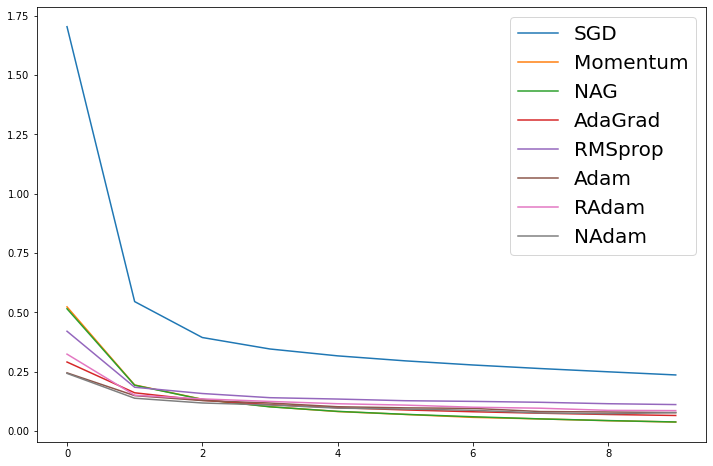

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(range(10),loss_SGD)
plt.plot(range(10),loss_Momentum)
plt.plot(range(10),loss_NAG)
plt.plot(range(10),loss_AdaGrad)
plt.plot(range(10),loss_RMSprop)
plt.plot(range(10),loss_Adam)
plt.plot(range(10),loss_RAdam)
plt.plot(range(10),loss_NAdam)
plt.legend(["SGD","Momentum","NAG","AdaGrad","RMSprop","Adam","RAdam","NAdam"],fontsize=20)

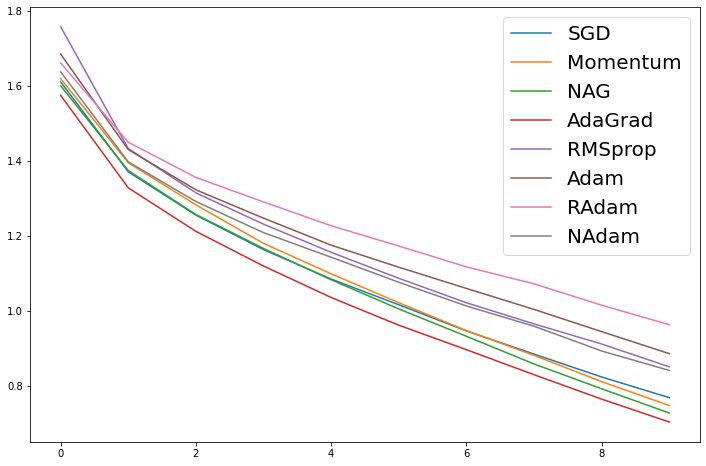

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(range(10),loss_value_SGD)
plt.plot(range(10),loss_value_Momentum)
plt.plot(range(10),loss_value_NAG)
plt.plot(range(10),loss_value_AdaGrad)
plt.plot(range(10),loss_value_RMSprop)
plt.plot(range(10),loss_value_Adam)
plt.plot(range(10),loss_value_RAdam)
plt.plot(range(10),loss_value_NAdam)
plt.legend(["SGD","Momentum","NAG","AdaGrad","RMSprop","Adam","RAdam","NAdam"],fontsize=20)






In [ ]:
total_correct = pd.DataFrame(columns = ["맞힌 개수"],data = [9290,9741,9732,9706,9557,9638,9652,9632],index=["SGD","Momentum","NAG","AdaGrad","RMSprop","Adam","RAdam","NAdam"])

In [ ]:
total_correct= total_correct.sort_values("맞힌 개수",ascending=False)

In [ ]:
total_value_correct = pd.DataFrame(columns = ["맞힌 개수"],data = [3889,5419,5171,4657,4433,5257,5133,5156],index=["SGD","Momentum","NAG","AdaGrad","RMSprop","Adam","RAdam","NAdam"])

In [ ]:
total_value_correct= total_value_correct.sort_values("맞힌 개수",ascending=False)

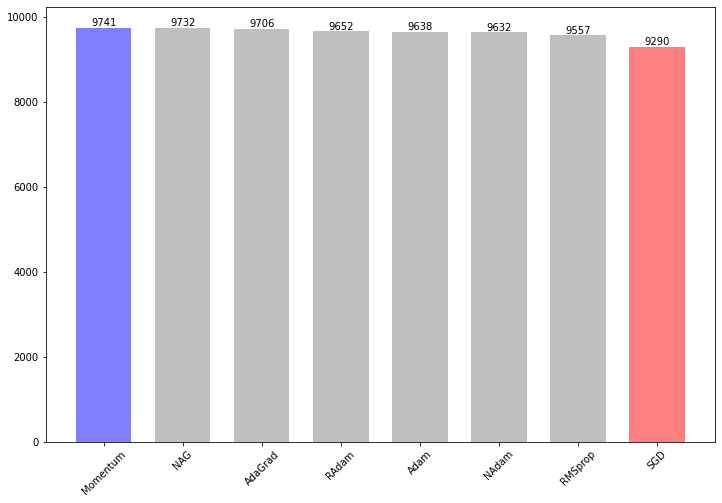

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(total_correct.index,total_correct["맞힌 개수"],width=0.7,color=["blue","gray","gray","gray","gray","gray","gray","red"],alpha=0.5)
plt.xticks(rotation=45)

x = np.array(total_correct.index)
y = np.array(total_correct["맞힌 개수"])

for i,v in enumerate(x):
  plt.text(v,y[i],y[i],
            color="black",
            horizontalalignment="center",
            verticalalignment="bottom")




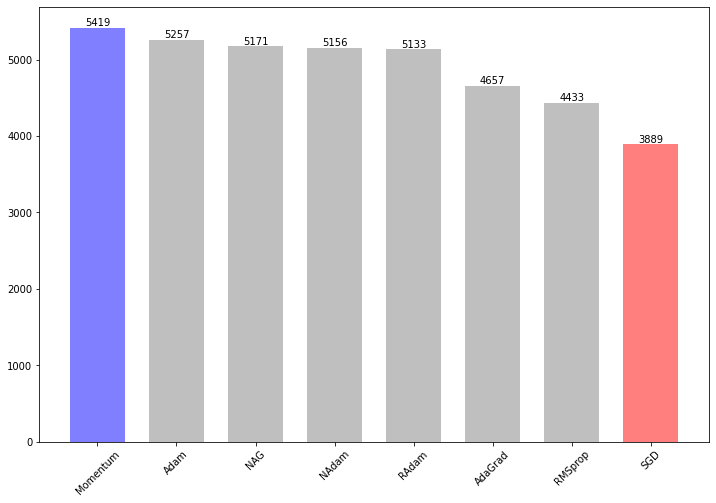

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(total_value_correct.index,total_value_correct["맞힌 개수"],width=0.7,color=["blue","gray","gray","gray","gray","gray","gray","red"],alpha=0.5)
plt.xticks(rotation=45)

x = np.array(total_value_correct.index)
y = np.array(total_value_correct["맞힌 개수"])

for i,v in enumerate(x):
  plt.text(v,y[i],y[i],
            color="black",
            horizontalalignment="center",
            verticalalignment="bottom")
